# TRAFFIC SIGN CLASSIFICATION USING CNN

# Citation for dataset reference:
J. Stallkamp, M. Schlipsing, J. Salmen and C. Igel, "The German Traffic Sign Recognition Benchmark: A multi-class classification competition," The 2011 International Joint Conference on Neural Networks, San Jose, CA, USA, 2011, pp. 1453-1460, doi: 10.1109/IJCNN.2011.6033395. keywords: {Humans;Training;Image color analysis;Benchmark testing;Lead;Histograms;Image resolution}.

Classes in the data: #43

- ( 0, b'Speed limit (20km/h)') 
- ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') 
- ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') 
- ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') 
- ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') 
- ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') 
- (12, b'Priority road')
- (13, b'Yield') 
- (14, b'Stop') 
- (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') 
- (17, b'No entry')
- (18, b'General caution') 
- (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') 
- (21, b'Double curve')
- (22, b'Bumpy road') 
- (23, b'Slippery road')
- (24, b'Road narrows on the right') 
- (25, b'Road work')
- (26, b'Traffic signals') 
- (27, b'Pedestrians') 
- (28, b'Children crossing')
- (29, b'Bicycles crossing') 
- (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') 
- (33, b'Turn right ahead')
- (34, b'Turn left ahead') 
- (35, b'Ahead only') 
- (36, b'Go straight or right')
- (37, b'Go straight or left') 
- (38, b'Keep right') 
- (39, b'Keep left')
- (40, b'Roundabout mandatory') 
- (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# IMAGE EXPLORATION

36

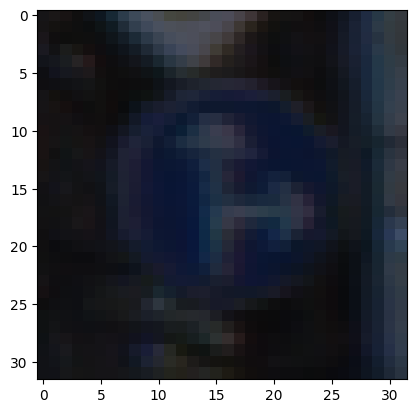

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# DATA PEPARATION

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

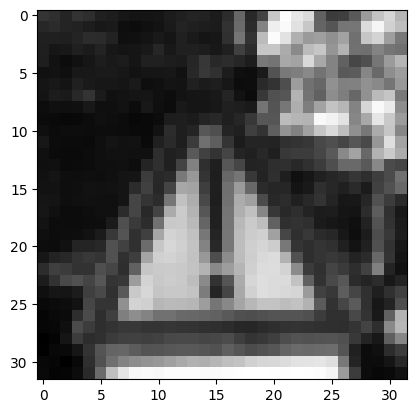

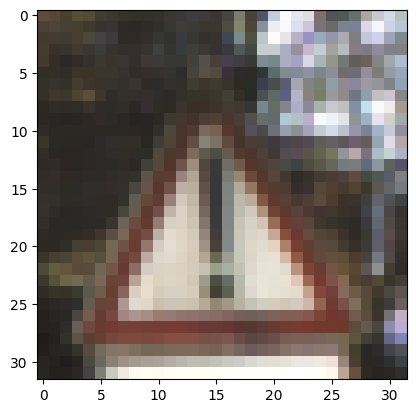

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# MODEL TRAINING

In [13]:
# Import train_test_split from scikit library
# Import Keras
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split


In [14]:
image_shape = X_train_gray[i].shape

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))


In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [17]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 11s 25ms/step - loss: 3.4055 - accuracy: 0.1085 - val_loss: 3.4361 - val_accuracy: 0.1186
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 2.9866 - accuracy: 0.2231 - val_loss: 3.0251 - val_accuracy: 0.2213
Epoch 3/50
70/70 [==============================] - 0s 4ms/step - loss: 2.5143 - accuracy: 0.3349 - val_loss: 2.6138 - val_accuracy: 0.3152
Epoch 4/50
70/70 [==============================] - 0s 4ms/step - loss: 2.1352 - accuracy: 0.4203 - val_loss: 2.3434 - val_accuracy: 0.3562
Epoch 5/50
70/70 [==============================] - 0s 4ms/step - loss: 1.8564 - accuracy: 0.4918 - val_loss: 2.0799 - val_accuracy: 0.4068
Epoch 6/50
70/70 [==============================] - 0s 4ms/step - loss: 1.6470 - accuracy: 0.5448 - val_loss: 1.9106 - val_accuracy: 0.4821
Epoch 7/50
70/70 [==============================] - 0s 4ms/step - loss: 1.4746 - accuracy: 0.5927 - val_loss: 1.7978 - val_accuracy: 0.4995
Epoch 8/50
70/70 [

In [18]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7432


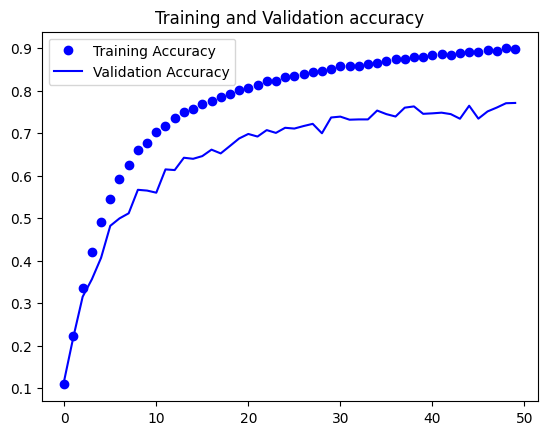

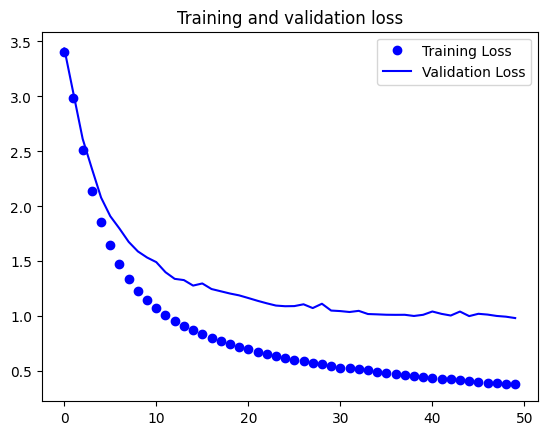

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
#get the predictions for the test data
predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test


395/395 [==============================] - 0s 1ms/step


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 22,  20,   3, ...,   0,   0,   0],
       [200, 407,  52, ...,   4,   0,   0],
       [144,  85, 386, ...,   6,   0,   0],
       ...,
       [  2,   9,  16, ...,  33,   0,   1],
       [  0,   1,   3, ...,   0,  13,   0],
       [  0,   1,   0, ...,   0,   1,  50]], dtype=int64)

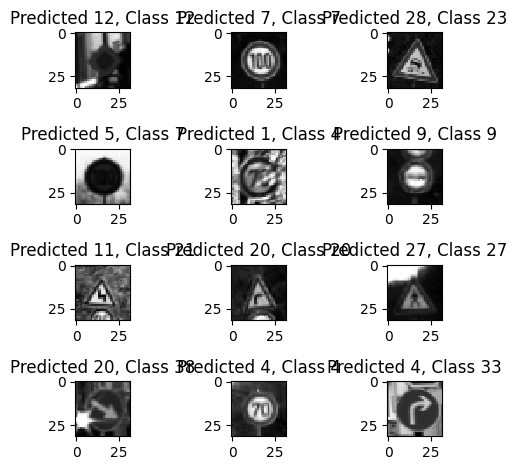

In [22]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()